# Определение перспективного тарифа для телеком компании

Федеральный оператор сотовой связи предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
•	минута разговора: 3 рубля
•	сообщение: 3 рубля
•	1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
•	минута разговора: 1 рубль
•	сообщение: 1 рубль
•	1 Гб интернет-трафика: 150 рублей

Тарифы округляют вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## 1. Знакомимся с данными

In [1]:
# Считываем файлы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

pd.set_option('display.max_columns', 500)

# Информация о тарифах
tariffs = pd.read_csv('/datasets/tariffs.csv')

# Информация о звонках
calls = pd.read_csv('/datasets/calls.csv')

# Информация об интернет-сессиях
internet = pd.read_csv('/datasets/internet.csv')

# Информация о сообщениях
messages = pd.read_csv('/datasets/messages.csv')

# Информация о пользователях
users = pd.read_csv('/datasets/users.csv')

#df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
# Условия тарифов
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [3]:
# Строки по звонкам
calls.sample(10)

,id,call_date,duration,user_id
35471,1088_273,2018-09-04,0.00,1088
63478,1160_300,2018-11-04,9.53,1160
135778,1346_328,2018-09-25,13.48,1346
19341,1052_490,2018-11-25,6.84,1052
24480,1063_9,2018-08-16,4.42,1063
168621,1415_341,2018-07-28,8.15,1415
192276,1472_89,2018-08-07,0.08,1472
67703,1171_728,2018-05-10,4.46,1171
166612,1411_27,2018-12-03,14.74,1411
132307,1340_281,2018-03-16,23.87,1340


In [4]:
# Данные по звонкам
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
# Строки по интернет-сессиям
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
99843,99843,1335_137,359.21,2018-07-06,1335
18112,18112,1063_133,289.77,2018-11-22,1063
60148,60148,1204_233,174.87,2018-12-27,1204
50109,50109,1172_391,190.33,2018-07-30,1172
92767,92767,1314_121,0.00,2018-03-14,1314
115151,115151,1388_168,513.12,2018-08-29,1388
49407,49407,1171_109,169.85,2018-12-23,1171
100868,100868,1338_258,426.16,2018-06-06,1338
100806,100806,1338_196,189.30,2018-12-18,1338
135440,135440,1454_131,0.00,2018-09-17,1454


In [6]:
# Данные по интернет-сессиям
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
# Строки по сообщениям
messages.sample(10)

,id,message_date,user_id
7604,1030_515,2018-06-14,1030
37630,1164_299,2018-09-16,1164
73235,1310_104,2018-10-12,1310
92225,1381_178,2018-06-21,1381
47545,1209_479,2018-10-14,1209
82783,1344_847,2018-05-09,1344
108909,1438_81,2018-10-27,1438
71768,1302_596,2018-02-13,1302
113605,1460_286,2018-10-19,1460
12851,1054_407,2018-11-12,1054


In [8]:
# Данные по сообщениям
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
# Строки о пользователях
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
54,1054,33,NaN,Омск,Кристина,Платонова,2018-03-20,smart
360,1360,46,NaN,Санкт-Петербург,Лаура,Макарова,2018-03-18,ultra
42,1042,42,NaN,Хабаровск,Константин,Добрынин,2018-11-25,smart
176,1176,37,NaN,Волгоград,Радим,Куприянов,2018-01-20,smart
403,1403,18,NaN,Брянск,Ахмет,Амелин,2018-05-20,ultra
140,1140,22,NaN,Киров,Леонид,Ахматулин,2018-12-31,smart
121,1121,62,NaN,Белгород,Марта,Афанасова,2018-05-04,smart
438,1438,24,2018-12-24,Екатеринбург,Нателла,Бородина,2018-10-05,smart
188,1188,41,NaN,Санкт-Петербург,Габриэль,Соколов,2018-02-04,smart
342,1342,20,NaN,Новосибирск,Валентина,Казакова,2018-10-18,smart


## 1. Выводы

* Таблица calls c данными о звонках содержат в 'duration' значения 0.00. Скорее всего это значение говорит о том, что абонент не дозвонлся и разговор не состоялся, поэтому эти записи в рамках нашего исследования нас не интересуют и их можно удалить.
* Таблица users c данными о пользователях в столбце 'churn_date' содержит дату прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных).

## 2. Предобработка данных

Calls. Информация о звонках

In [10]:
# Количество дублированных строк
calls.duplicated().sum()

0

In [11]:
# Количество пропущенных значений по столбцам
calls.isna().mean()

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

In [12]:
# Строки о звонках
calls.sample(10)

,id,call_date,duration,user_id
166036,1409_661,2018-07-13,8.83,1409
162056,1397_1,2018-12-22,5.40,1397
41546,1101_589,2018-12-18,8.43,1101
57026,1144_397,2018-11-07,3.59,1144
156025,1385_104,2018-12-06,1.46,1385
88957,1222_695,2018-10-24,0.00,1222
124005,1319_154,2018-12-14,2.62,1319
136160,1346_710,2018-12-15,0.00,1346
62051,1157_203,2018-06-23,16.02,1157
141039,1358_801,2018-05-09,3.73,1358


In [13]:
# Данные озвонках
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [14]:
# Переводим в формат даты calls['call_date']
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

#Проверка
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [15]:
# Удаляем из calls строки, где длительность разговора 0.00
calls = calls[calls['duration'] != 0]

# Проверка
calls[calls['duration'] == 0]

,id,call_date,duration,user_id


In [16]:
# Смотрим изменения в calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null float64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Internet. Данные о интернет сессиях.

In [17]:
# Количество дублированных строк
internet.duplicated().sum()

0

In [18]:
# Количество пропущенных значений по столбцам
internet.isna().mean()

Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

In [19]:
# Строки
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
147602,147602,1494_41,824.92,2018-09-09,1494
107254,107254,1363_300,458.75,2018-11-09,1363
142626,142626,1477_523,0.00,2018-10-28,1477
109,109,1000_109,693.44,2018-07-11,1000
42679,42679,1148_267,391.57,2018-04-23,1148
136249,136249,1457_91,47.87,2018-08-20,1457
121378,121378,1409_345,137.03,2018-10-14,1409
113634,113634,1384_344,115.34,2018-06-02,1384
12049,12049,1043_47,405.47,2018-11-14,1043
88165,88165,1299_82,951.59,2018-06-02,1299


In [20]:
# Данные о звонках
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [21]:
# Переводим в формат даты internet['session_date']
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

#Проверка
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


Messages. Данные о сообщениях.

In [22]:
# Количество дублированных строк
messages.duplicated().sum()

0

In [23]:
# Количество пропущенных значений по столбцам
messages.isna().mean()

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

In [24]:
# Строки
messages.sample(10)

,id,message_date,user_id
118283,1481_54,2018-12-23,1481
21923,1092_204,2018-11-13,1092
18811,1083_0,2018-06-06,1083
113723,1460_404,2018-05-07,1460
106237,1430_312,2018-12-28,1430
38893,1167_199,2018-12-10,1167
86529,1358_158,2018-04-23,1358
48520,1214_319,2018-10-02,1214
111633,1452_22,2018-08-08,1452
7295,1030_206,2018-08-21,1030


In [25]:
# Данные о сообщениях
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [26]:
# Переводим в формат даты messages['message_date']
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')

#Проверка
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Users. Данные о пользователях

In [27]:
# Количество дублированных строк
users.duplicated().sum()

0

In [28]:
# Количество пропущенных значений по столбцам
users.isna().mean()

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

In [29]:
# Строки
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
35,1035,37,NaN,Тюмень,Розалия,Аракина,2018-04-03,smart
385,1385,26,NaN,Москва,Алиса,Дубинина,2018-01-13,ultra
162,1162,63,NaN,Москва,Марта,Минаева,2018-10-09,smart
148,1148,23,NaN,Тольятти,Евдокия,Киреева,2018-04-17,ultra
349,1349,67,NaN,Севастополь,Гайдар,Курочкин,2018-12-18,ultra
100,1100,58,NaN,Санкт-Петербург,Руслан,Красильников,2018-07-02,smart
350,1350,40,NaN,Омск,Варвара,Козырева,2018-08-30,ultra
83,1083,24,NaN,Сочи,Рустэм,Галкин,2018-04-24,smart
387,1387,74,NaN,Краснодар,Габриель,Зуев,2018-12-21,smart
480,1480,29,2018-09-26,Новокузнецк,Гелена,Емельянова,2018-02-14,smart


In [30]:
# Данные о пользователях
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [31]:
# Определяем минимальную дату исследуемого нами периода
calls['call_date'].min()

Timestamp('2018-01-01 00:00:00')

In [32]:
# Определяем максимальныю дату исследуемого нами периода
calls['call_date'].max()

Timestamp('2018-12-31 00:00:00')

In [33]:
# Заменяем пропуски в users в столбце churn_date на '2020-01-01'
future_time = '2020-01-01'
users['churn_date'] = users['churn_date'].fillna(future_time)

# Проверка
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
165,1165,19,2020-01-01,Самара,Алексей,Медведев,2018-10-14,ultra
126,1126,71,2020-01-01,Санкт-Петербург,Яна,Арсенкова,2018-01-19,ultra
104,1104,60,2020-01-01,Нижний Тагил,Габриэль,Поляков,2018-02-21,ultra
257,1257,21,2020-01-01,Санкт-Петербург,Габриель,Жданов,2018-06-17,ultra
173,1173,46,2020-01-01,Красноярск,Агафья,Григорьева,2018-06-21,smart
419,1419,19,2020-01-01,Новороссийск,Эльмира,Яшина,2018-07-19,smart
454,1454,29,2020-01-01,Томск,Адам,Алешин,2018-03-08,smart
212,1212,21,2020-01-01,Саранск,Руслан,Пономарев,2018-11-09,smart
489,1489,35,2020-01-01,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
198,1198,26,2020-01-01,Ярославль,Эдуард,Швецов,2018-08-15,smart


In [34]:
# Переводим в users в формат даты столбцы message_date и reg_date
users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')

#Проверка
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## 2. Выводы

calls - Дублированных строк нет, пропусков нет.
* id - не интересует в рамках исследования
* call_date - перевели тип object в data
* duration - удалили строки со значением 0.00 (39613 строк удалено)
* user_id - тип int, оставляем без изменений

internet - Дублированных строк нет, пропусков нет.
* Unnamed: 0, id - не интересуют в рамках исследования
* mb_used - тип float, оставляем без изменений
* session_date - перевели тип object в data
* user_id - тип int, оставляем без изменений

messages - Дублированных строк нет, пропусков нет.
* id - не интересует в рамках исследования
* message_dat - перевели тип object в data
* user_id - тип int, оставляем без изменений

users - Дублированных строк нет.
* user_id - - тип int, оставляем без изменений
* age, first_name, last_name - не интересуют в рамках исследования
* churn_date - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных), поэтому все пропуски заменили на дату, которая точно не попадает в исследуемый нами период ('2020-01-01'), тип odject перевели в data.
* reg_date - перевели тип object в data
* tariff - тип objec, оставляем без изменений

## 3. Обработка данных

### Посчитаем количество звонков и количество израсходованных минут по абонентам по месяцам, предворительно округлив время разговора до целых минут вверх (таково условие тарифов).

In [35]:
# Округляем длительность звонка до целых минут вверх 
calls['duration_up'] = calls['duration'].apply(np.ceil)

# Добавляем столбец month с месяцем звонка
calls['month'] = calls['call_date'].values.astype('datetime64[M]')

calls.head(10)

,id,call_date,duration,user_id,duration_up,month
2,1000_2,2018-06-11,2.85,1000,3.0,2018-06-01
3,1000_3,2018-09-21,13.80,1000,14.0,2018-09-01
4,1000_4,2018-12-15,5.18,1000,6.0,2018-12-01
7,1000_7,2018-08-22,18.31,1000,19.0,2018-08-01
8,1000_8,2018-09-15,18.44,1000,19.0,2018-09-01
10,1000_10,2018-08-22,5.03,1000,6.0,2018-08-01
11,1000_11,2018-05-28,18.82,1000,19.0,2018-05-01
12,1000_12,2018-07-05,2.02,1000,3.0,2018-07-01
13,1000_13,2018-09-29,7.15,1000,8.0,2018-09-01
14,1000_14,2018-12-11,9.13,1000,10.0,2018-12-01


In [36]:
# Считаем количество звонков и количество израсходованных минут по абонентам по месяцам
calls_user_month = calls.groupby(['user_id', 'month']).agg({'duration_up': ['count', 'sum']}).reset_index()

# Перименовываем столбцы
calls_user_month.columns = ['user_id', 'month', 'calls_count', 'calls_minutes']

calls_user_month.head(10)

,user_id,month,calls_count,calls_minutes
0,1000,2018-05-01,17,159.0
1,1000,2018-06-01,28,172.0
2,1000,2018-07-01,41,340.0
3,1000,2018-08-01,42,408.0
4,1000,2018-09-01,46,466.0
5,1000,2018-10-01,44,350.0
6,1000,2018-11-01,37,338.0
7,1000,2018-12-01,38,333.0
8,1001,2018-11-01,45,430.0
9,1001,2018-12-01,47,414.0


### Посчитаем количество сообщений по абонентам по месяцам.

In [37]:
# Данные о сообщениях
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [38]:
# Добавляем столбец month с месяцем сообщения
messages['month'] = messages['message_date'].values.astype('datetime64[M]')

messages.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01
5,1000_5,2018-06-20,1000,2018-06-01
6,1000_6,2018-11-19,1000,2018-11-01
7,1000_7,2018-10-29,1000,2018-10-01
8,1000_8,2018-06-25,1000,2018-06-01
9,1000_9,2018-12-18,1000,2018-12-01


In [39]:
# Считаем количество сообщений по абонентам по месяцам
messages_user_month = messages.groupby(['user_id', 'month']).agg({'month': ['count']}).reset_index()

# Переименовываем столбцы
messages_user_month.columns = ['user_id', 'month', 'message_count']

messages_user_month.head(10)

,user_id,month,message_count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
5,1000,2018-10-01,73
6,1000,2018-11-01,58
7,1000,2018-12-01,70
8,1002,2018-06-01,4
9,1002,2018-07-01,11


### Посчитаем объем израсходованного интернет-трафика по месяцам, предворительно округлив до целых мегабайтов вверх (таково условие тарифов).

In [40]:
# Вывод данных по интернет-сессиям
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [41]:
# Округляем интернет-сессии до целых мегабайтов вверх
internet['mb_used_up'] = internet['mb_used'].apply(np.ceil)

# Добавляем столбец month с месяцем интернет-сессии
internet['month'] = internet['session_date'].values.astype('datetime64[M]')

internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id,mb_used_up,month
0,0,1000_0,112.95,2018-11-25,1000,113.0,2018-11-01
1,1,1000_1,1052.81,2018-09-07,1000,1053.0,2018-09-01
2,2,1000_2,1197.26,2018-06-25,1000,1198.0,2018-06-01
3,3,1000_3,550.27,2018-08-22,1000,551.0,2018-08-01
4,4,1000_4,302.56,2018-09-24,1000,303.0,2018-09-01
5,5,1000_5,399.97,2018-10-02,1000,400.0,2018-10-01
6,6,1000_6,540.08,2018-09-07,1000,541.0,2018-09-01
7,7,1000_7,415.70,2018-07-11,1000,416.0,2018-07-01
8,8,1000_8,505.40,2018-10-08,1000,506.0,2018-10-01
9,9,1000_9,345.54,2018-09-03,1000,346.0,2018-09-01


In [42]:
# Считаем количество израсходованных мегабайт по абонентам по месяцам
internet_user_month = internet.groupby(['user_id', 'month']).agg({'mb_used_up': ['sum']}).reset_index()

# Переименовываем столбцы
internet_user_month.columns = ['user_id', 'month', 'internet_mb']

internet_user_month.head(10)

,user_id,month,internet_mb
0,1000,2018-05-01,2256.0
1,1000,2018-06-01,23257.0
2,1000,2018-07-01,14016.0
3,1000,2018-08-01,14070.0
4,1000,2018-09-01,14581.0
5,1000,2018-10-01,14717.0
6,1000,2018-11-01,14768.0
7,1000,2018-12-01,9827.0
8,1001,2018-11-01,18452.0
9,1001,2018-12-01,14053.0


### Создадим таблицу, где на каждого абонента будет каждый месяц.

In [43]:
# Смотрм данные по абонентам
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2020-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2020-01-01,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2020-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2020-01-01,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2020-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [44]:
# Добавляем столбцы с месяцем подключения тарифа и с месяцем прекращения пользования тарифом
users['reg_month'] = users['reg_date'].values.astype('datetime64[M]')
users['churn_month'] = users['churn_date'].values.astype('datetime64[M]')

users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,1000,52,2020-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01,2020-01-01
1,1001,41,2020-01-01,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,2020-01-01
2,1002,59,2020-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-06-01,2020-01-01
3,1003,23,2020-01-01,Москва,Белла,Белякова,2018-08-17,ultra,2018-08-01,2020-01-01
4,1004,68,2020-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01,2020-01-01


In [45]:
# Создаем таблицу user_shot с нужными нам столбцами
users_shot = users[['user_id', 'reg_month', 'churn_month', 'tariff', 'city']]

users_shot.head()

,user_id,reg_month,churn_month,tariff,city
0,1000,2018-05-01,2020-01-01,ultra,Краснодар
1,1001,2018-11-01,2020-01-01,smart,Москва
2,1002,2018-06-01,2020-01-01,smart,Стерлитамак
3,1003,2018-08-01,2020-01-01,ultra,Москва
4,1004,2018-05-01,2020-01-01,ultra,Новокузнецк


In [46]:
# Определяем границы временного интервала за которые у нас есть данные
min_month = calls['call_date'].values.astype('datetime64[M]').min()
max_month = calls['call_date'].values.astype('datetime64[M]').max()

(min_month, max_month)

(numpy.datetime64('2018-01'), numpy.datetime64('2018-12'))

In [47]:
pd.date_range(min_month, max_month, freq='MS')

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [48]:
# Создаем таблицу с месяцами периода за который у нас данные
dt = pd.DataFrame(pd.date_range(min_month, max_month, freq='MS'))
dt.columns = ['month']
dt

,month
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


#### Теперь сделаем крос джоин таблиц dt и users_shot

In [49]:
# Проводим крос джоин таблиц dt и users_shot
dt['key'] = 1
users_shot['key'] = 1

df = dt.merge(users_shot, on='key')

df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,month,key,user_id,reg_month,churn_month,tariff,city
0,2018-01-01,1,1000,2018-05-01,2020-01-01,ultra,Краснодар
1,2018-01-01,1,1001,2018-11-01,2020-01-01,smart,Москва
2,2018-01-01,1,1002,2018-06-01,2020-01-01,smart,Стерлитамак
3,2018-01-01,1,1003,2018-08-01,2020-01-01,ultra,Москва
4,2018-01-01,1,1004,2018-05-01,2020-01-01,ultra,Новокузнецк


In [50]:
# Количество строк, которое должно получиться после крос джоин таблиц dt и users_shot 
len(dt)*len(users_shot)

6000

In [51]:
# Получили количество строк df
len(df)

6000

#### У нас есть абоненты которые пришли после минимальной даты (2018-01), а также те, которые ушли до максимальной даты (2018-12). Удалим из df строки по этим пользователям в тех месяцах, где они не были клиентами оператора.

In [52]:
# Удалим из df строки по пользователям в тех месяцах, где они не были клиентами оператора.
df = df[(df['month'] >= df['reg_month'])&(df['month'] <= df['churn_month'])]

# Заменяем старые индексы новыми
df.reset_index(drop=True)

len(df)

3216

In [53]:
# Посмотрим отдельного абонента
df[df['user_id'] == 1000]

,month,key,user_id,reg_month,churn_month,tariff,city
2000,2018-05-01,1,1000,2018-05-01,2020-01-01,ultra,Краснодар
2500,2018-06-01,1,1000,2018-05-01,2020-01-01,ultra,Краснодар
3000,2018-07-01,1,1000,2018-05-01,2020-01-01,ultra,Краснодар
3500,2018-08-01,1,1000,2018-05-01,2020-01-01,ultra,Краснодар
4000,2018-09-01,1,1000,2018-05-01,2020-01-01,ultra,Краснодар
4500,2018-10-01,1,1000,2018-05-01,2020-01-01,ultra,Краснодар
5000,2018-11-01,1,1000,2018-05-01,2020-01-01,ultra,Краснодар
5500,2018-12-01,1,1000,2018-05-01,2020-01-01,ultra,Краснодар


In [54]:
df

,month,key,user_id,reg_month,churn_month,tariff,city
5,2018-01-01,1,1005,2018-01-01,2020-01-01,smart,Набережные Челны
32,2018-01-01,1,1032,2018-01-01,2020-01-01,smart,Ульяновск
45,2018-01-01,1,1045,2018-01-01,2020-01-01,smart,Улан-Удэ
55,2018-01-01,1,1055,2018-01-01,2020-01-01,smart,Казань
71,2018-01-01,1,1071,2018-01-01,2018-08-01,smart,Омск
...,...,...,...,...,...,...,...
5994,2018-12-01,1,1494,2018-08-01,2020-01-01,smart,Омск
5995,2018-12-01,1,1495,2018-08-01,2020-01-01,ultra,Иркутск
5996,2018-12-01,1,1496,2018-01-01,2020-01-01,smart,Вологда
5997,2018-12-01,1,1497,2018-10-01,2020-01-01,smart,Челябинск


### Имея таблицу df, где на каждого абонента есть каждый месяц. присоеденим к ней данные по звонкам, сообщениям и интернет.

In [55]:
# Заполняем df данными по звонкам, сообщениям и интернет
df = df.merge(calls_user_month, how='left', on=['user_id', 'month'])
df = df.merge(messages_user_month, how='left', on=['user_id', 'month'])
df = df.merge(internet_user_month, how='left', on=['user_id', 'month'])
df

,month,key,user_id,reg_month,churn_month,tariff,city,calls_count,calls_minutes,message_count,internet_mb
0,2018-01-01,1,1005,2018-01-01,2020-01-01,smart,Набережные Челны,11.0,95.0,7.0,2730.0
1,2018-01-01,1,1032,2018-01-01,2020-01-01,smart,Ульяновск,44.0,380.0,38.0,24147.0
2,2018-01-01,1,1045,2018-01-01,2020-01-01,smart,Улан-Удэ,1.0,9.0,5.0,2348.0
3,2018-01-01,1,1055,2018-01-01,2020-01-01,smart,Казань,47.0,551.0,30.0,17111.0
4,2018-01-01,1,1071,2018-01-01,2018-08-01,smart,Омск,18.0,194.0,16.0,15622.0
...,...,...,...,...,...,...,...,...,...,...,...
3211,2018-12-01,1,1494,2018-08-01,2020-01-01,smart,Омск,54.0,418.0,NaN,17645.0
3212,2018-12-01,1,1495,2018-08-01,2020-01-01,ultra,Иркутск,120.0,1031.0,84.0,23450.0
3213,2018-12-01,1,1496,2018-01-01,2020-01-01,smart,Вологда,65.0,518.0,51.0,20757.0
3214,2018-12-01,1,1497,2018-10-01,2020-01-01,smart,Челябинск,58.0,545.0,17.0,19940.0


#### В ходе заполнения таблицы df могли образоваться пропуски в тех строках, в которых абонент не совершал звонков или не писал сообщений, или не пользовался интернетом. Заполним их нулями.

In [56]:
# Проверяем наличие пропусков
df.isna().mean()

month            0.000000
key              0.000000
user_id          0.000000
reg_month        0.000000
churn_month      0.000000
tariff           0.000000
city             0.000000
calls_count      0.014925
calls_minutes    0.014925
message_count    0.155162
internet_mb      0.004042
dtype: float64

In [57]:
# Заменяем проуски на нуль
df = df.fillna(0)

# Проверяем отсутствие пропусков
df.isna().mean()

month            0.0
key              0.0
user_id          0.0
reg_month        0.0
churn_month      0.0
tariff           0.0
city             0.0
calls_count      0.0
calls_minutes    0.0
message_count    0.0
internet_mb      0.0
dtype: float64

#### Проверим бьются ли суммы по звонкам, сообщениям и интернет.

In [58]:
# Проверяем равенство суммы количества звонков
df['calls_count'].sum() - calls['user_id'].count()

0.0

In [59]:
# Проверяем равенство суммы количества израсходаванных минут
df['calls_minutes'].sum() - calls['duration_up'].sum()

0.0

In [60]:
# Проверяем равенство количества сообщений
df['message_count'].sum() - messages['user_id'].count()

0.0

In [61]:
# Проверяем равенство сумм израсходованных мб
df['internet_mb'].sum() - internet['mb_used_up'].sum()

0.0

### Посчитаем помесячную выручку с каждого пользователя.

#### Зададим параметры тарифов.

In [62]:
# Параметры тарифа smart
smart_price = 550
smart_free_minutes = 500
smart_free_mb = 15360
smart_free_messages = 50
smart_minute_price = 3
smart_message_price = 3
smart_mb_price = 200/1024

# Параметры тарифа ultra
ultra_price = 1950
ultra_free_minutes = 3000
ultra_free_mb = 30720
ultra_free_messages = 1000
ultra_minute_price = 1
ultra_message_price = 1
ultra_mb_price = 150/1024

In [63]:
# Функция для расчета выручки по абоненту
def bill(row):
    if row['tariff'] == 'smart':
        revenu = smart_price
        
        if row['calls_minutes'] > smart_free_minutes:
            revenu = revenu + (row['calls_minutes'] - smart_free_minutes)*smart_minute_price
            
        if row['message_count'] > smart_free_messages:
            revenu = revenu + (row['message_count'] - smart_free_messages)*smart_message_price
                
        if row['internet_mb'] > smart_free_mb:
            revenu = revenu + (row['internet_mb'] - smart_free_mb)*smart_mb_price
        
        return revenu            
        
   
    if row['tariff'] == 'ultra':
        revenu = ultra_price
        
        if row['calls_minutes'] > ultra_free_minutes:
            revenu = revenu + (row['calls_minutes'] - ultra_free_minutes)*ultra_minute_price
            
        if row['message_count'] > ultra_free_messages:
            revenu = revenu + (row['message_count'] - ultra_free_messages)*ultra_message_price
                
        if row['internet_mb'] > ultra_free_mb:
            revenu = revenu + (row['internet_mb'] - ultra_free_mb)*ultra_mb_price
        
        return revenu

In [64]:
# Считаем выручку по абоненту и записываем в столбец bill
df['bill'] = df.apply(bill, axis=1)
df

,month,key,user_id,reg_month,churn_month,tariff,city,calls_count,calls_minutes,message_count,internet_mb,bill
0,2018-01-01,1,1005,2018-01-01,2020-01-01,smart,Набережные Челны,11.0,95.0,7.0,2730.0,550.000000
1,2018-01-01,1,1032,2018-01-01,2020-01-01,smart,Ульяновск,44.0,380.0,38.0,24147.0,2266.210938
2,2018-01-01,1,1045,2018-01-01,2020-01-01,smart,Улан-Удэ,1.0,9.0,5.0,2348.0,550.000000
3,2018-01-01,1,1055,2018-01-01,2020-01-01,smart,Казань,47.0,551.0,30.0,17111.0,1044.992188
4,2018-01-01,1,1071,2018-01-01,2018-08-01,smart,Омск,18.0,194.0,16.0,15622.0,601.171875
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,2018-12-01,1,1494,2018-08-01,2020-01-01,smart,Омск,54.0,418.0,0.0,17645.0,996.289062
3212,2018-12-01,1,1495,2018-08-01,2020-01-01,ultra,Иркутск,120.0,1031.0,84.0,23450.0,1950.000000
3213,2018-12-01,1,1496,2018-01-01,2020-01-01,smart,Вологда,65.0,518.0,51.0,20757.0,1661.101562
3214,2018-12-01,1,1497,2018-10-01,2020-01-01,smart,Челябинск,58.0,545.0,17.0,19940.0,1579.531250


## 3. Выводы

В ходе обработки данных была создана таблица df. В данной таблице собрана следующая информация по клиентам по месяцам:
* тариф абонента
* количество совершенных звонков
* количество израсходованных минут
* количество израсходованных sms
* количество израсходованных mb
* счет клиента - выручка 

## 4. Исследовательский анализ

#### Построим распределения для звонков, сообщений, интернет тркафика по тарифам и рассчитаем для них среднее, дисперсию и стандартное отклонение.

In [65]:
# Тариф smart
df_smart = df[df['tariff'] == 'smart']

# Тариф ultra
df_ultra = df[df['tariff'] == 'ultra']

##### Напишем функцию, которая будет принимать имя столбца в df_smart и df_ultra и строить гистограммы  для тарифов, а также считать для них среднюю, дисперсию и стандартное отклонение. 

In [66]:
def hist(col):
# Строим гистограммы израсходованных минут в месяц для тарифов smart и ultra
    df_smart[col].hist(bins=50, figsize=(15,7), label='smart', alpha=0.5)
    df_ultra[col].hist(bins=50, figsize=(15,7), label='ultra', alpha=0.5)
    
    plt.xlabel(col)
    plt.ylabel('Количество случаев')
    plt.legend()
    plt.show()

# Считаем среднее, дисперсию и стандартное отклонение для минут в тарифе smart
    smart_mean = df_smart[col].mean()
    smart_var = np.var(df_smart[col])
    smart_var_sqrt = np.sqrt(smart_var)

# Считаем среднее, дисперсию и стандартное отклонение для минут в тарифе ultra
    ultra_mean = df_ultra[col].mean()
    ultra_var = np.var(df_ultra[col])
    ultra_var_sqrt = np.sqrt(ultra_var)

# Создаем датафрейм со значениями среднее, дисперсию и стандартное отклонение для минут в тарифах smart и ultra
    info = {'Величина/Тариф': ['среднее', 'дисперсия', 'станд_откл'],
             'smart': [smart_mean, smart_var, smart_var_sqrt],
             'ultra': [ultra_mean, ultra_var, ultra_var_sqrt]}

    frame_info = pd.DataFrame(info)
    return frame_info

### Звонки. Гисторгамма количества израсходованных абонентами минут в месяц.

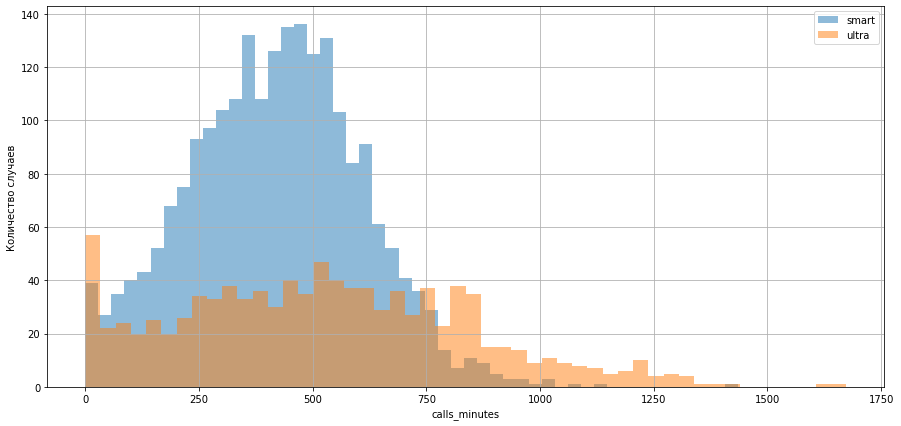

,Величина/Тариф,smart,ultra
0,среднее,417.747534,526.089249
1,дисперсия,36265.124153,100950.006233
2,станд_откл,190.434041,317.726307


In [67]:
hist('calls_minutes')

#### Из гистограмм видим, что поведение абонентов в отношении израсходованного количества минут в месяц сильно отличатся. Так у абонентов тарифа smart наблюдается выраженный максимум плотности распределения израсходованных минут в районе значения 450 минут/мес, и распределение напоминает нормальное. Тогда как распределение минут у абонентов тарифа ultra имеет ровный характер и не имеет явно выраженного максимума. В среднем абоненты ultra расходуют больше минут в месяц, чем абоненты smart. 526мин и 418мин соответственно.

### Сообщения. Гистограмма количества отправленных sms абонентами в месяц.

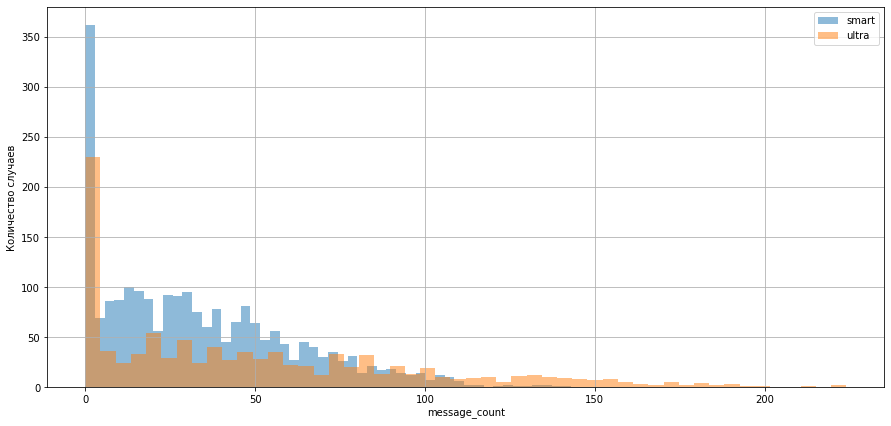

,Величина/Тариф,smart,ultra
0,среднее,33.369058,49.313387
1,дисперсия,796.597877,2283.099557
2,станд_откл,28.224066,47.781791


In [68]:
hist('message_count')

#### Из гистограмм видим, что распределения имеют ровный характер. У тарифа smart почти нет абонентов, которые отправляют более 120 сообщений. У тарифа ultra распределение по количеству отправленных сообщений более ровное, чем у smart и есть существенное количество клиентов, которые отправляют в месяц более 120 сообщений. Кроме этого у обоих тарифов присутствует значительное количество абонентов, которые отправляют очень мало сообщений или не отправляют их вовсе.   

### Интернет. Гистограмма количества израсходованных mb абонентами в месяц.

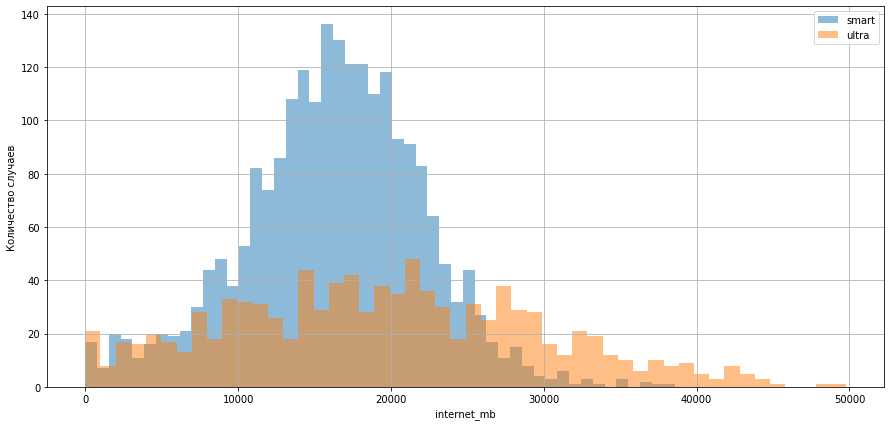

,Величина/Тариф,smart,ultra
0,среднее,1.622191e+04,1.946714e+04
1,дисперсия,3.463299e+07,1.021136e+08
2,станд_откл,5.884980e+03,1.010513e+04


In [69]:
hist('internet_mb')

#### Из гистограмм видим, что поведение абонентов в отношении израсходованного количества mb в месяц сильно отличатся. Так у абонентов тарифа smart наблюдается выраженный максимум плотности распределения израсходованных mb в районе среднего значения и составляет 16222 mb/мес, и распределение напоминает нормальное. Тогда как распределение mb у абонентов тарифа ultra имеет ровный характер и не имеет явно выраженного максимума. В среднем абоненты ultra расходуют больше mb в месяц, чем абоненты smart. 19467mb и 16222mb соответственно.

### Выручка. Гистограмма месячной выручки по абонентам в рублях.

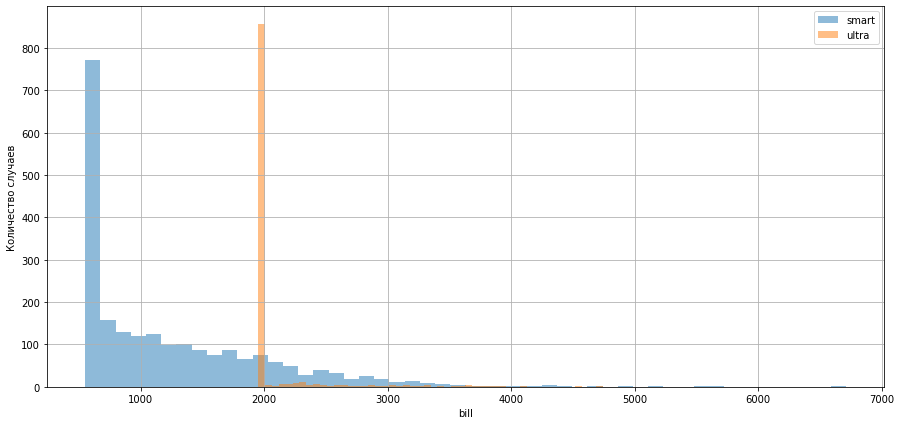

,Величина/Тариф,smart,ultra
0,среднее,1233.043032,2060.417872
1,дисперсия,620105.455909,126708.151498
2,станд_откл,787.467749,355.960885


In [70]:
hist('bill')

## 5. Проверка гипотез

#### Гипотеза 1.
* Нулевая гипотеза - средняя месячная выручка по пользователям тарифов ultra и smart равна. 
* Альтернативная гипотеза - средняя месячная выручка по пользователям тарифов ultra и smart различается.

In [71]:
# Задаем параметр альфа
alpha_all = 0.05

result_all = st.ttest_ind(df_smart['bill'], df_ultra['bill'])

print('p-значение:', result_all.pvalue)

if result_all.pvalue < alpha_all:
    print('Отвергаем нулевую гипотезу')

else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 6.129437607153987e-191
Отвергаем нулевую гипотезу


#### Таким образом средняя месячная выручка по пользователям тарифов ultra и smart имеет статистически значимое различие и равна 2060руб. и 1233руб. соответственно.

#### Гипотеза 2.
* Нулевая гипотеза - средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
* Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [72]:
# Выводим названия городов
df['city'].unique()

array(['Набережные Челны', 'Ульяновск', 'Улан-Удэ', 'Казань', 'Омск',
       'Чита', 'Краснодар', 'Санкт-Петербург', 'Красноярск',
       'Архангельск', 'Ставрополь', 'Кострома', 'Волгоград', 'Тамбов',
       'Москва', 'Киров', 'Ростов-на-Дону', 'Уфа', 'Вологда', 'Пенза',
       'Магнитогорск', 'Иркутск', 'Орёл', 'Астрахань', 'Подольск',
       'Ярославль', 'Новокузнецк', 'Нижний Тагил', 'Мурманск', 'Самара',
       'Воронеж', 'Пермь', 'Саранск', 'Новосибирск', 'Владивосток',
       'Нижний Новгород', 'Новороссийск', 'Брянск', 'Челябинск',
       'Калининград', 'Барнаул', 'Якутск', 'Тольятти', 'Курган', 'Томск',
       'Балашиха', 'Саратов', 'Петрозаводск', 'Тюмень', 'Курск', 'Тула',
       'Сочи', 'Калуга', 'Оренбург', 'Смоленск', 'Хабаровск', 'Рязань',
       'Махачкала', 'Тверь', 'Ижевск', 'Чебоксары', 'Белгород',
       'Череповец', 'Стерлитамак', 'Владимир', 'Волжский', 'Екатеринбург',
       'Севастополь', 'Нижневартовск', 'Грозный', 'Владикавказ', 'Химки',
       'Сургут', 'Липе

In [73]:
# Отбираем записи для Москвы
df_moscow = df[df['city'] == 'Москва']

# Отбираем записи для других регионов
df_reg = df[df['city'] != 'Москва']

In [74]:
# Средняя месячная выручка по абонентам в Москве
df_moscow['bill'].mean()

1507.276761968085

In [75]:
# Средняя месячная выручка по абонентам в других регионах (не Москве)
df_reg['bill'].mean()

1481.8855588711613

In [76]:
# Задаем параметр альфа
alpha_moscow = 0.05

result_moscow = st.ttest_ind(df_moscow['bill'], df_reg['bill'])

print('p-значение:', result_moscow.pvalue)

if result_moscow.pvalue < alpha_moscow:
    print('Отвергаем нулевую гипотезу')

else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4712668200760739
Не получилось отвергнуть нулевую гипотезу


#### Таким образом средняя месячная выручка по пользователям в Москве и других регионах не имеет статистически значимого отличия и равна 1507руб. и 1481руб. соответственно.

## 6. Выводы

### Поведение абонентов по тарифам smart и ultra отличается между собой. У этих групп наиболее сильно отличаются распределения по абонентам таких месячных показателей как: количество израсходованных минут и mb, в то время, как средние значения этих показателей отличаются не так явно. 

### У обоих тарифов присутствует значительное количество абонентов, которые отправляют очень мало сообщений или не отправляют их вовсе.

### Исследование показало, что средняя месячная выручка по пользователям тарифов ultra и smart имеет статистически значимое различие и равна 2060руб. и 1233руб. соответственно.

### Исследование показало, что средняя месячная выручка по пользователям в Москве и других регионах не имеет статистически значимого отличия и равна 1507руб. и 1481руб. соответственно.